In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
dataset=pd.read_csv(r'D:\udemy\Social_Network_Ads.csv')

In [4]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [25]:
x=dataset.iloc[:,[2,3]].values
y=dataset.iloc[:,4].values

In [26]:
#Splitting the dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [27]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
x_train=sc_x.fit_transform(x_train)
x_test=sc_x.transform(x_test)

In [28]:
#Fitting logistic regression
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0)
classifier.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [29]:
#predicting test result
y_pred=classifier.predict(x_test)

In [30]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [31]:
x_test

array([[-0.80480212,  0.50496393],
       [-0.01254409, -0.5677824 ],
       [-0.30964085,  0.1570462 ],
       [-0.80480212,  0.27301877],
       [-0.30964085, -0.5677824 ],
       [-1.10189888, -1.43757673],
       [-0.70576986, -1.58254245],
       [-0.21060859,  2.15757314],
       [-1.99318916, -0.04590581],
       [ 0.8787462 , -0.77073441],
       [-0.80480212, -0.59677555],
       [-1.00286662, -0.42281668],
       [-0.11157634, -0.42281668],
       [ 0.08648817,  0.21503249],
       [-1.79512465,  0.47597078],
       [-0.60673761,  1.37475825],
       [-0.11157634,  0.21503249],
       [-1.89415691,  0.44697764],
       [ 1.67100423,  1.75166912],
       [-0.30964085, -1.37959044],
       [-0.30964085, -0.65476184],
       [ 0.8787462 ,  2.15757314],
       [ 0.28455268, -0.53878926],
       [ 0.8787462 ,  1.02684052],
       [-1.49802789, -1.20563157],
       [ 1.07681071,  2.07059371],
       [-1.00286662,  0.50496393],
       [-0.90383437,  0.30201192],
       [-0.11157634,

In [32]:
#making confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

In [33]:
cm

array([[65,  3],
       [ 8, 24]], dtype=int64)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


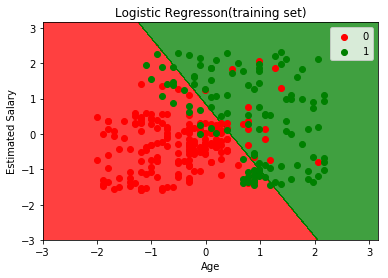

In [35]:
#visualization
from matplotlib.colors import ListedColormap
x_set,y_set=x_train,y_train
x1,x2=np.meshgrid(np.arange(start=x_set[:,0].min()-1,stop=x_set[:,0].max()+1,step=0.01),
                 np.arange(start=x_set[:,0].min()-1,stop=x_set[:,0].max()+1,step=0.01))
plt.contourf(x1,x2,classifier.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
            alpha=0.75,cmap=ListedColormap(('red','green')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i ,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j,0],x_set[y_set==j,1],
               c=ListedColormap(('red','green'))(i),label=j)
plt.title('Logistic Regresson(training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [36]:
x_train[:,0].min()


-1.9931891594584856

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


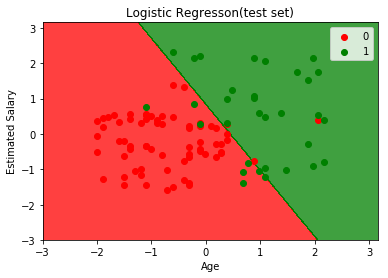

In [38]:
#visualization
from matplotlib.colors import ListedColormap
x_set,y_set=x_test,y_test
x1,x2=np.meshgrid(np.arange(start=x_set[:,0].min()-1,stop=x_set[:,0].max()+1,step=0.01),
                 np.arange(start=x_set[:,0].min()-1,stop=x_set[:,0].max()+1,step=0.01))
plt.contourf(x1,x2,classifier.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
            alpha=0.75,cmap=ListedColormap(('red','green')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i ,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j,0],x_set[y_set==j,1],
               c=ListedColormap(('red','green'))(i),label=j)
plt.title('Logistic Regresson(test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()